In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Colormap, ListedColormap
import seaborn as sns

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

X, y = make_classification(
    n_samples=200, n_features=2,
    n_informative=2, n_redundant=0,
    random_state=42
)


data = pd.DataFrame(np.hstack((X, y.reshape(-1, 1))),
                    columns=['x1', 'x2', 'y'])

In [3]:
data.head()

,x1,x2,y
0,1.689767,-1.408241,1.0
1,1.530287,-1.459848,1.0
2,-1.175042,-1.447633,0.0
3,-2.585395,0.963532,0.0
4,1.372246,0.440695,1.0


__Задание 1.__

Обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделяющую поверхность на трейне (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились? (2б)

In [4]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)
    

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [6]:
# обучим решающее дерево
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

### Your code is here
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [7]:
decision_tree.score(X_train, y_train), decision_tree.score(X_test, y_test)

(1.0, 0.8)

In [8]:
# расчитаем accuracy
print( f"accuracy на обучающей и тестовой выборках: \
{accuracy_score(y_train, decision_tree.predict(X_train))}, {accuracy_score(y_test,decision_tree.predict(X_test))} ")

accuracy на обучающей и тестовой выборках: 1.0, 0.8 


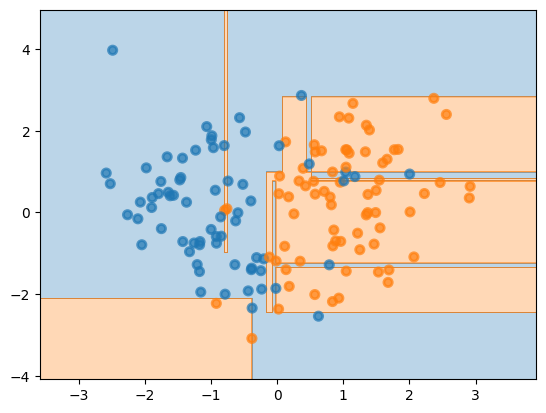

In [9]:
# разделяющая поверхность на трейне и тесте
plot_surface(decision_tree, X_train, y_train)

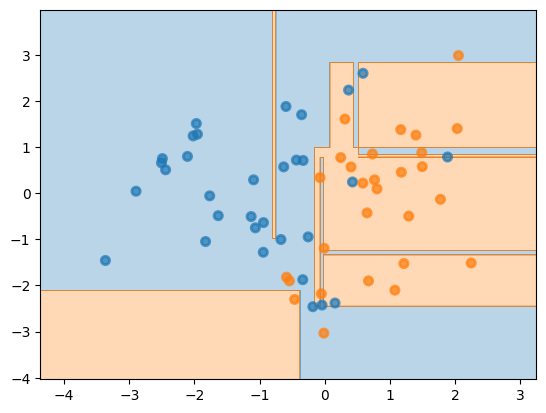

In [10]:
plot_surface(decision_tree, X_test, y_test)

__Задание 2.__

Переберите несколько параметров для регуляризации (`max_depth`, `min_samples_leaf`) из предложенных. Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Используйте, если хотите, функцию ниже. Как изменение параметров влияет на поверхность? При каких параметрах на тесте достигается лучшее качество? А на трейне? (2б).

In [11]:
def plot_surface_axes(clf, X, y, ax, train_acc, test_acc):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
    edgecolors=np.array(palette)[y], linewidths=2)
    
    ax.plot([], [], label = 'train_acc : %0.5f' % train_acc)
    ax.plot([], [], label = 'test_acc : %0.5f' % test_acc)
    
    plt.legend(loc = 'lower right', prop={'size': 20})

In [12]:
max_depth_set = [6, 7, 8, 9, 12]

min_samples_leaf_set = [3, 5, 7, 10]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2,
                                                    random_state = 42) 

accuracy train         mds=6 , msl=3         0.94375
accuracy train         mds=6 , msl=5         0.925
accuracy train         mds=6 , msl=7         0.9125
accuracy train         mds=6 , msl=10         0.9
accuracy train         mds=7 , msl=3         0.94375
accuracy train         mds=7 , msl=5         0.925
accuracy train         mds=7 , msl=7         0.9125
accuracy train         mds=7 , msl=10         0.9
accuracy train         mds=8 , msl=3         0.94375
accuracy train         mds=8 , msl=5         0.925
accuracy train         mds=8 , msl=7         0.9125
accuracy train         mds=8 , msl=10         0.9
accuracy train         mds=9 , msl=3         0.94375
accuracy train         mds=9 , msl=5         0.925
accuracy train         mds=9 , msl=7         0.9125
accuracy train         mds=9 , msl=10         0.9
accuracy train         mds=12 , msl=3         0.94375
accuracy train         mds=12 , msl=5         0.925
accuracy train         mds=12 , msl=7         0.9125
accuracy train   

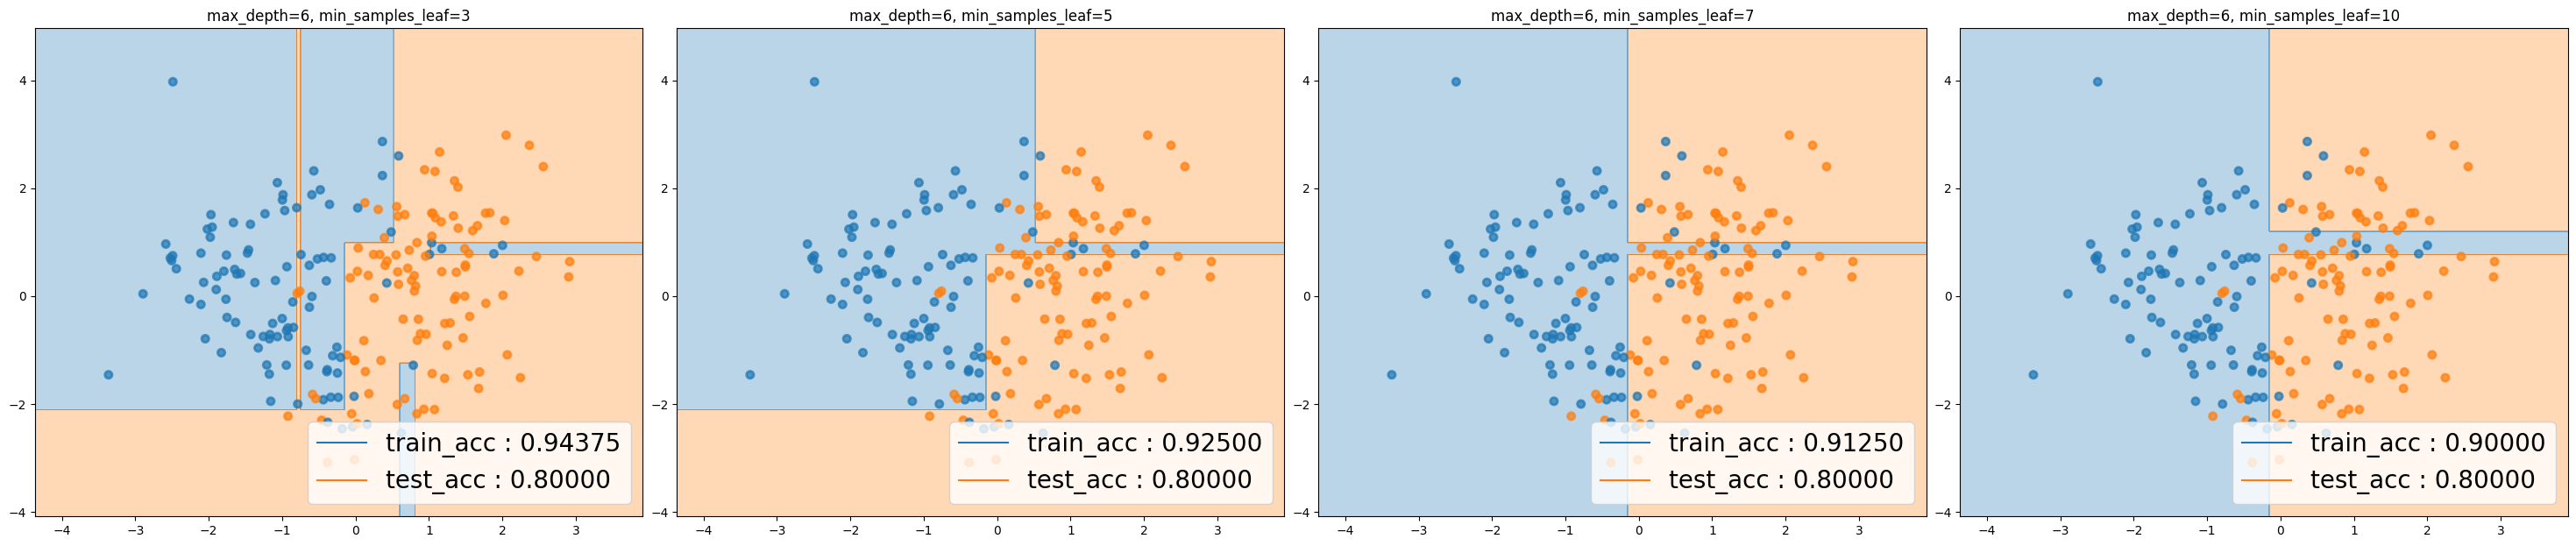

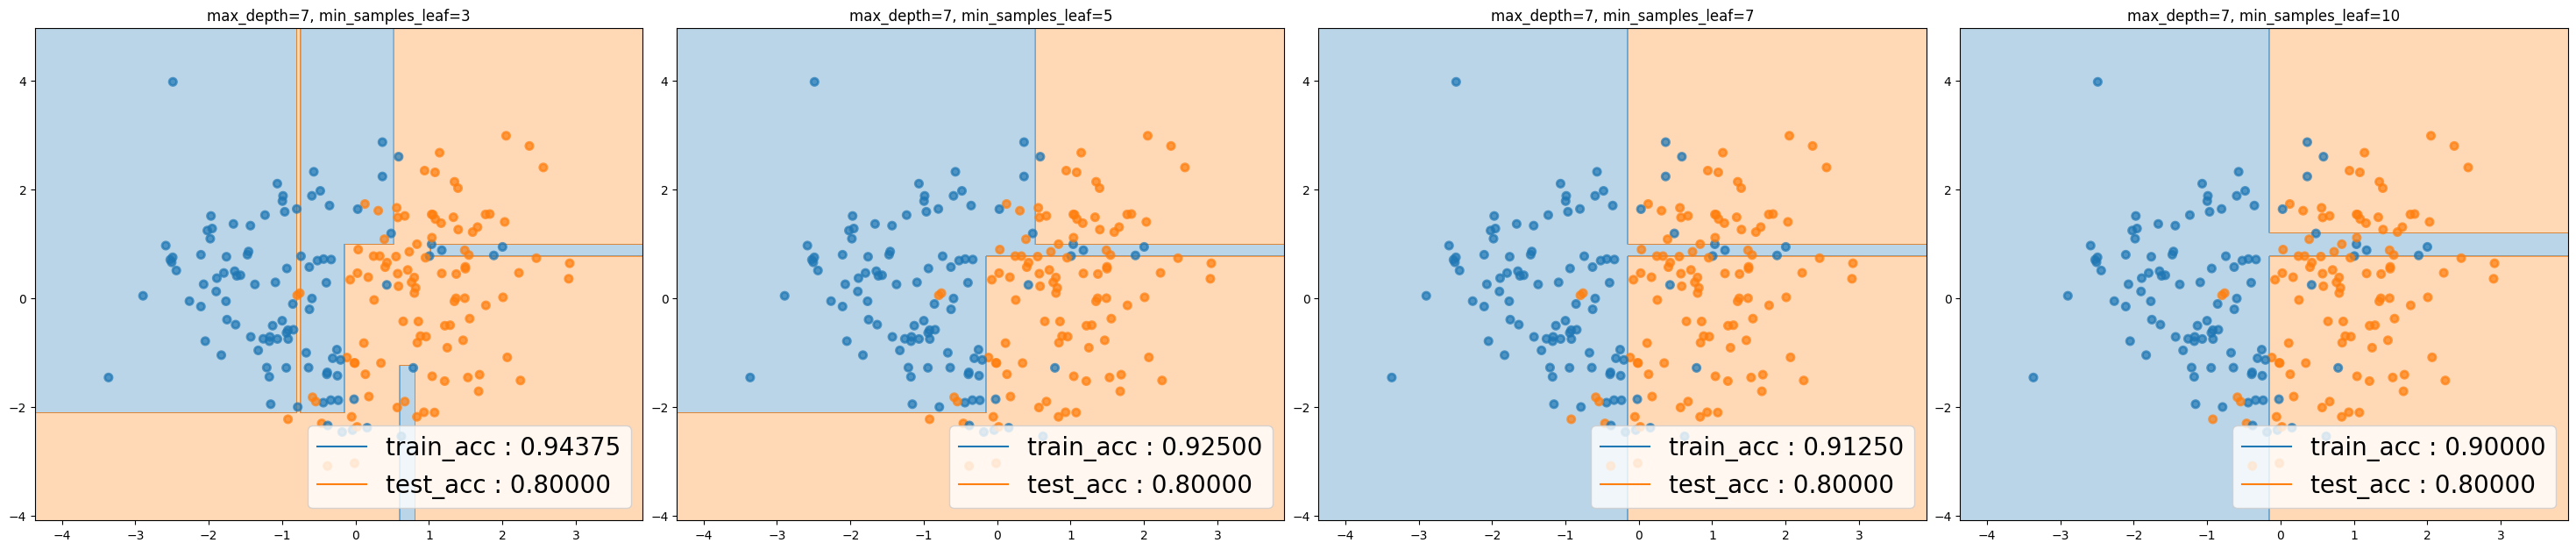

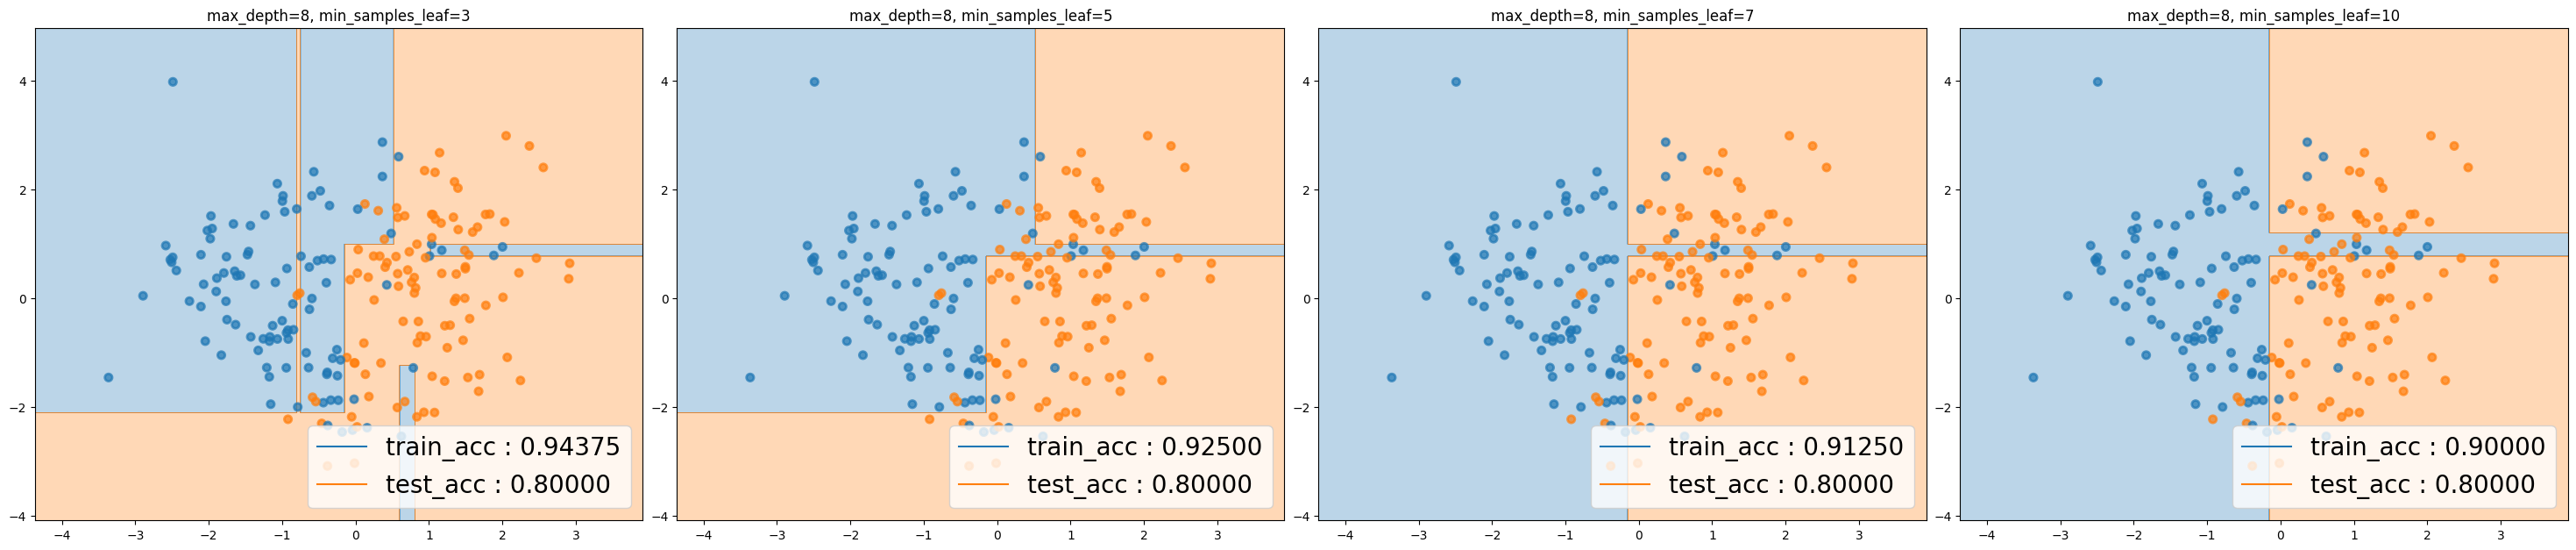

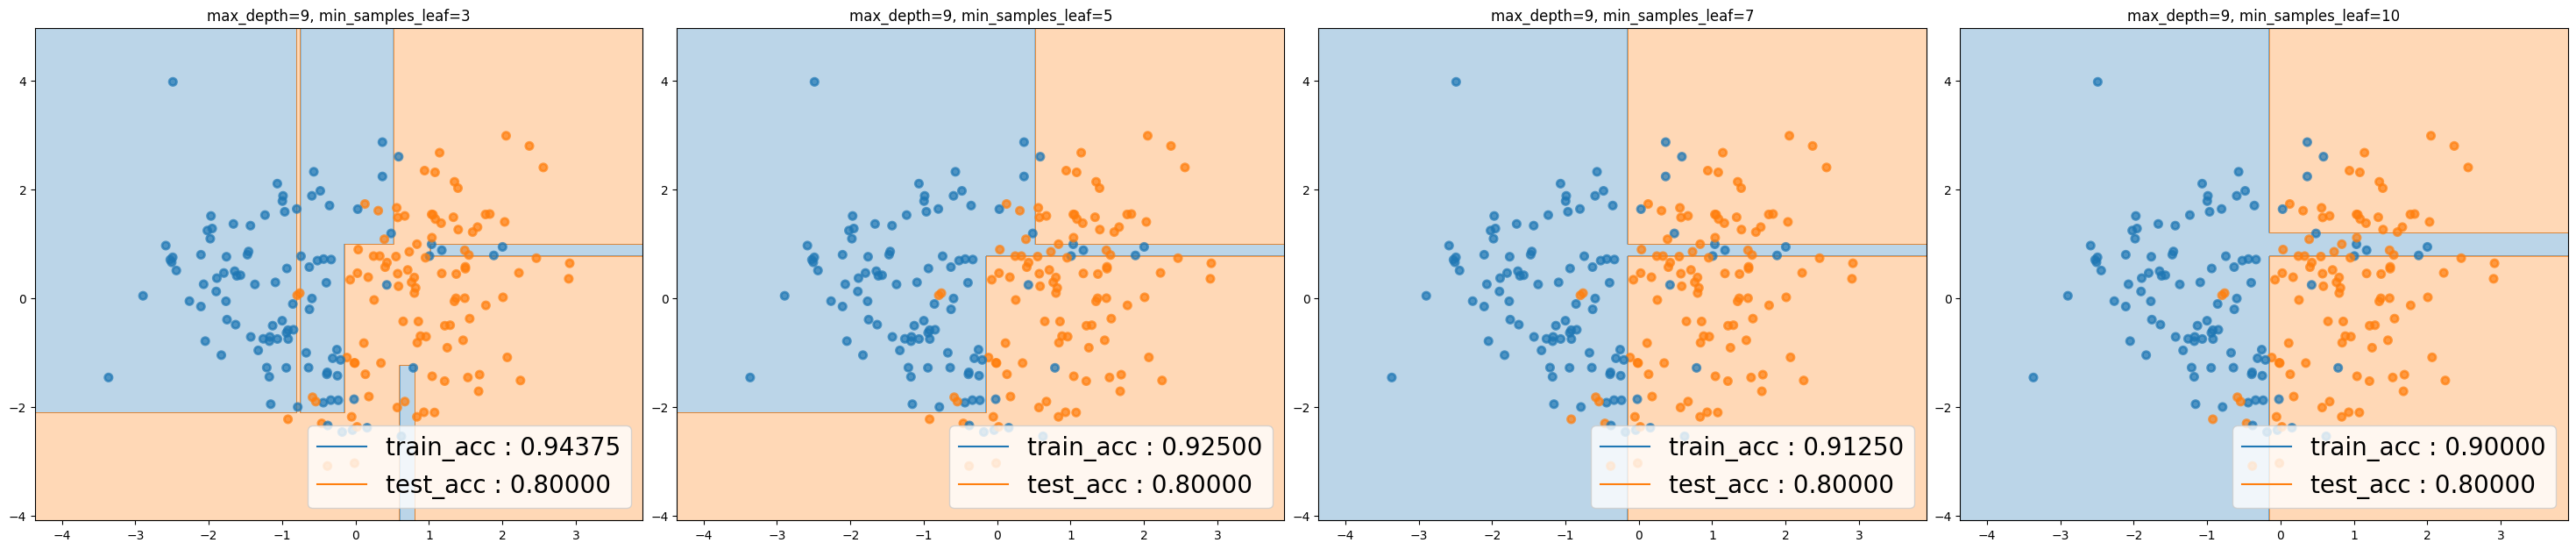

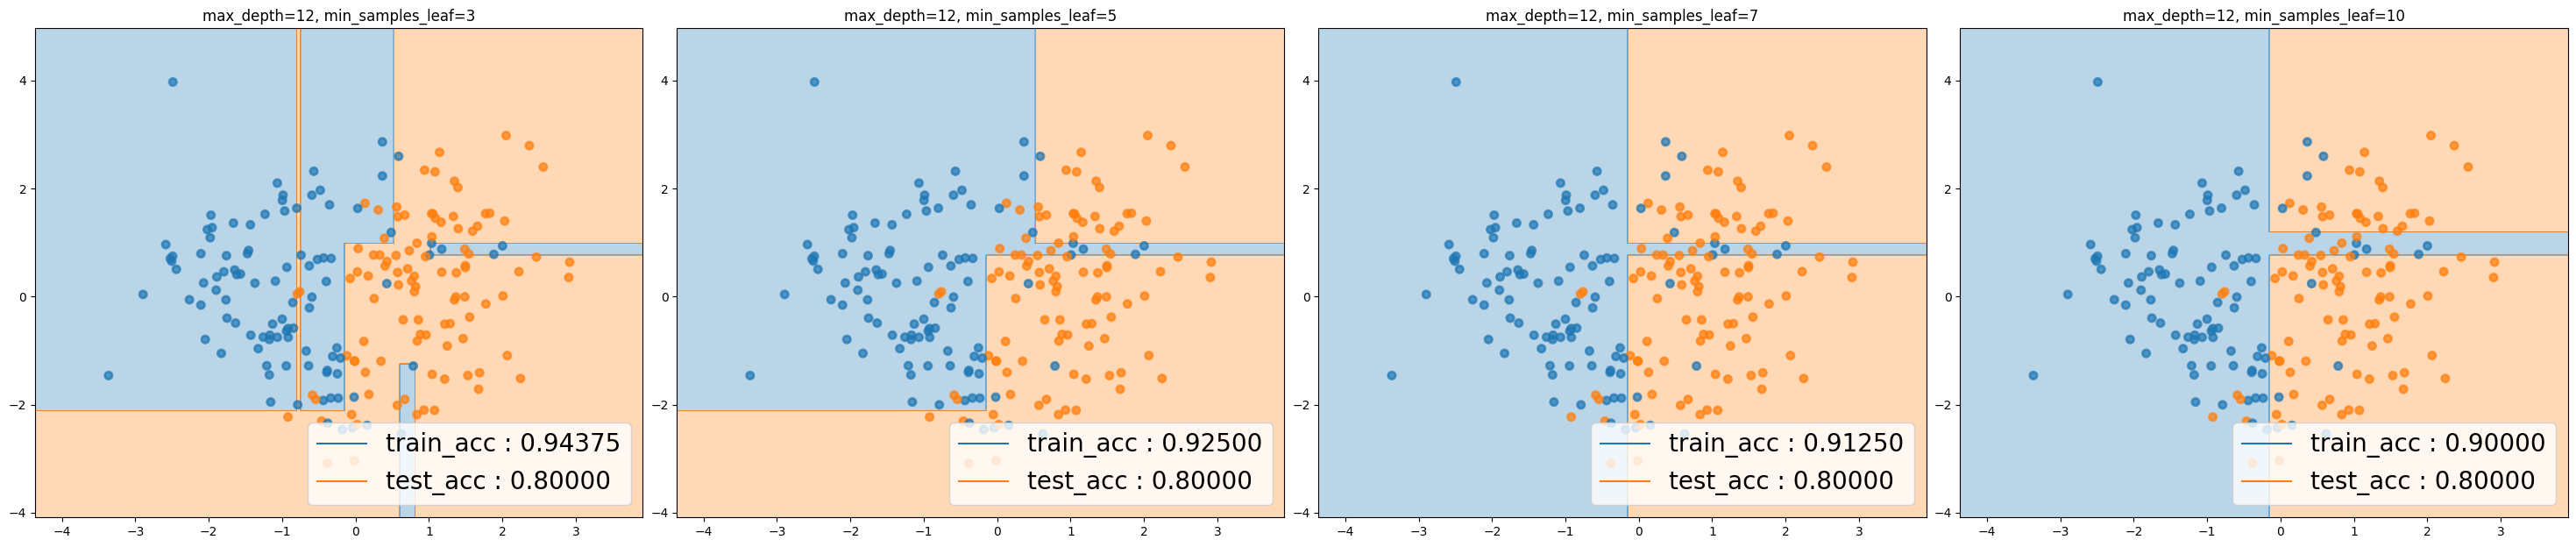

In [16]:
### Your code is here
# посчитаем accuracy в цикле перебирая параметры на трейне , выведем параметры
row_num = len(max_depth_set)
col_num = len(min_samples_leaf_set)
i = 1

for mds in max_depth_set:
    f = plt.figure()
    f.set_figheight(30)
    f.set_figwidth(30)
    for msl in min_samples_leaf_set:
        decision_tree_2 = DecisionTreeClassifier(max_depth=mds, min_samples_leaf=msl)
        decision_tree_2.fit(X_train, y_train)
        
        train_acc = decision_tree_2.score(X_train, y_train)
        test_acc = decision_tree_2.score(X_test, y_test)
        
        print( f"accuracy train \
        {mds=} , {msl=} \
        {decision_tree_2.score(X_train, y_train).round(5)}")

        ax = f.add_subplot(row_num, col_num, i)
        plot_surface_axes(decision_tree_2, X, y, ax, train_acc, test_acc)
        ax.set_title(f'max_depth={mds}, min_samples_leaf={msl}')
        
        i += 1

        
### 6, 3

In [17]:
# посчитаем accuracy в цикле перебирая параметры на тесте , выведем параметры
for mds in max_depth_set:
    for msl in min_samples_leaf_set:
        decision_tree_2 = DecisionTreeClassifier(max_depth=mds, min_samples_leaf=msl)
        decision_tree_2.fit(X_train, y_train)
        print( f"accuracy test \
        {mds=} , {msl=} \
        {decision_tree_2.score(X_test, y_test).round(5)}")

accuracy test         mds=6 , msl=3         0.8
accuracy test         mds=6 , msl=5         0.8
accuracy test         mds=6 , msl=7         0.8
accuracy test         mds=6 , msl=10         0.8
accuracy test         mds=7 , msl=3         0.8
accuracy test         mds=7 , msl=5         0.8
accuracy test         mds=7 , msl=7         0.8
accuracy test         mds=7 , msl=10         0.8
accuracy test         mds=8 , msl=3         0.8
accuracy test         mds=8 , msl=5         0.8
accuracy test         mds=8 , msl=7         0.8
accuracy test         mds=8 , msl=10         0.8
accuracy test         mds=9 , msl=3         0.8
accuracy test         mds=9 , msl=5         0.8
accuracy test         mds=9 , msl=7         0.8
accuracy test         mds=9 , msl=10         0.8
accuracy test         mds=12 , msl=3         0.8
accuracy test         mds=12 , msl=5         0.8
accuracy test         mds=12 , msl=7         0.8
accuracy test         mds=12 , msl=10         0.8


__Задание 3.__

Добавим признак $2\cdot x_1 - x_2$, транформацию добавим как шаг пайплайна. С помощью данного класса (из практики/лекции) обучите дерево с максимальной глубиной=3, нарисуйте поверхность на трейне, посчитайте accuracy (2 б)

In [22]:
from sklearn.base import BaseEstimator, TransformerMixin

class CustomFunctionTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, first_col, second_col, function):
        self.first_col = first_col
        self.second_col = second_col
        self.function = function
        print("Инициализировали класс!")
        
    def fit(self, X, y=None):
        print("Зафитили датасет!")
        return self
    
    def transform(self, X, y=None):
        
        X_ = X.copy()
        X_['new_feature'] = self.function(X_[self.first_col], X_[self.second_col])
        X_ = X_.drop([self.first_col, self.second_col], axis=1)
        
        print("Трансформировали датасет!")
        return X_

In [23]:
X_train = pd.DataFrame(X_train, columns=['x1', 'x2'])
X_test = pd.DataFrame(X_test, columns=['x1', 'x2'])

In [24]:
from sklearn.pipeline import Pipeline

### Your code is here

pipe = Pipeline([('custom_transformer', 
                  CustomFunctionTransformer("x1", "x2",
                                            lambda x1,x2: 2 * x1 - x2)),
                 ('decision_tree', DecisionTreeClassifier(max_depth=3))
                ])

pipe.fit(X_train, y_train)

Инициализировали класс!
Зафитили датасет!
Трансформировали датасет!


Pipeline(steps=[('custom_transformer',
                 CustomFunctionTransformer(first_col='x1',
                                           function=<function <lambda> at 0x7f3bf6caf370>,
                                           second_col='x2')),
                ('decision_tree', DecisionTreeClassifier(max_depth=3))])

In [25]:
np.round(pipe.score(X_train, y_train),2), np.round(pipe.score(X_test, y_test),2)

Трансформировали датасет!
Трансформировали датасет!


(0.86, 0.75)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Трансформировали датасет!
Трансформировали датасет!


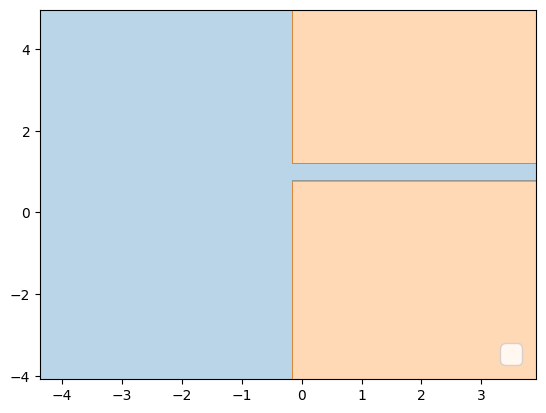

In [30]:
ax = f.add_subplot()
test_acc = pipe.score(X_test, y_test)
train_acc = pipe.score(X_train, y_train)
plot_surface_axes(decision_tree_2, X, y, ax, train_acc, test_acc)
#ax.set_title(f'max_depth={mds}, min_samples_leaf={msl}')